In [36]:
import tensorflow as tf

In [37]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full),(X_test,y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [38]:
X_train.shape

(55000, 28, 28)

In [39]:
X_train.dtype

dtype('uint8')

In [40]:
X_train, X_valid, X_test = X_train/255., X_valid/255., X_test/255.

In [41]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress', 'Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
class_names[y_train[0]]

'Ankle boot'

Building the neural network

In [42]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = [28,28]))
model.add(tf.keras.layers.Flatten()) # Converts each input image into a 1D array
model.add(tf.keras.layers.Dense(300,activation = "relu"))
model.add(tf.keras.layers.Dense(100,activation = "relu"))
model.add(tf.keras.layers.Dense(10,activation = "softmax"))

The model's summary() method displays all teh model's layers, including each layer's name(auto generated unless specified), its output shape and its number of parameters

In [43]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 300)               235500    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.layers

In [45]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()
print(weights)
print(weights.shape)
print(biases)
print(biases.shape)

[[-0.01315404 -0.00040164  0.0625973  ...  0.04869431 -0.05874536
   0.00075076]
 [ 0.0593355   0.01873949 -0.01651669 ...  0.05820952  0.01599653
  -0.00310941]
 [-0.00228462  0.03465505  0.05534948 ... -0.06019921  0.03541788
  -0.01045556]
 ...
 [-0.03187586 -0.02214614 -0.00552632 ...  0.06143747 -0.06040635
  -0.04697803]
 [ 0.02579074  0.02612651  0.02571384 ... -0.02469555  0.0688116
   0.02617399]
 [ 0.02838154  0.05208623 -0.02710683 ... -0.00371078  0.01783191
  -0.04163972]]
(784, 300)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [46]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer="sgd", metrics = ["accuracy"])

After a model is created we must compile it to specify the loss function and the optimizer to use. We use the sparse categorical loss because we have sparse labels(0 - 9).

In [47]:
history = model.fit(X_train,y_train,epochs = 30, validation_data = (X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7353 - accuracy: 0.7550 - val_loss: 0.5139 - val_accuracy: 0.8276
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4953 - accuracy: 0.8277 - val_loss: 0.4618 - val_accuracy: 0.8328
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4466 - accuracy: 0.8426 - val_loss: 0.4272 - val_accuracy: 0.8514
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4202 - accuracy: 0.8530 - val_loss: 0.4006 - val_accuracy: 0.8592
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3984 - accuracy: 0.8591 - val_loss: 0.3940 - val_accuracy: 0.8592
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3808 - accuracy: 0.8659 - val_loss: 0.3991 - val_accuracy: 0.8618
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3676 - accuracy: 0.8702 - val_loss: 0.3717 - val_accuracy:

The fit() methods returns a History object containing the training parameters (hsitory.params), the list of epochs it went through (history.epoch) and most importantly a dictionary  (history.history) containing teh loss and extra metrics it measured at the end of each epoch on the training set and on the validation set(if any).

We can use this dictionary to create a Pandas Dataframe and call its plot() method to get the learning curves as follows:

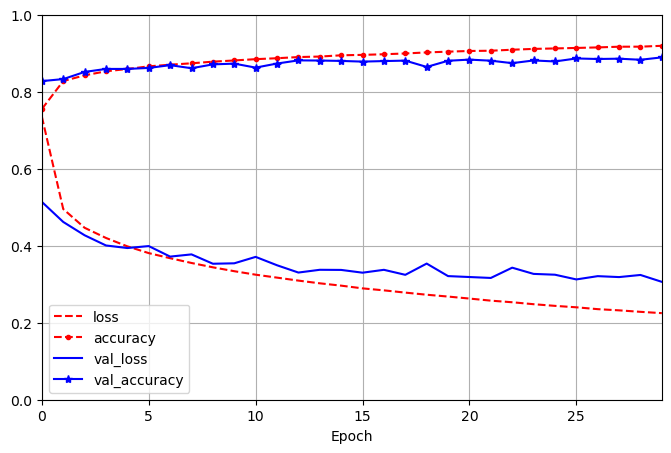

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(
    figsize=(8,5),xlim = [0,29], ylim = [0,1], grid = True, xlabel = "Epoch",style=['r--','r--.','b-','b-*']
)
plt.show()

In [49]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 767us/step - loss: 0.3211 - accuracy: 0.8860


[0.32107701897621155, 0.8859999775886536]

In [50]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 103ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.01, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [51]:
import numpy as np
y_pred = y_proba.argmax(axis = -1)
y_pred

array([9, 2, 1])

In [52]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')